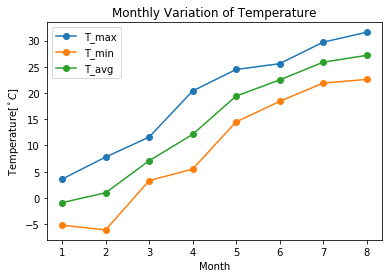

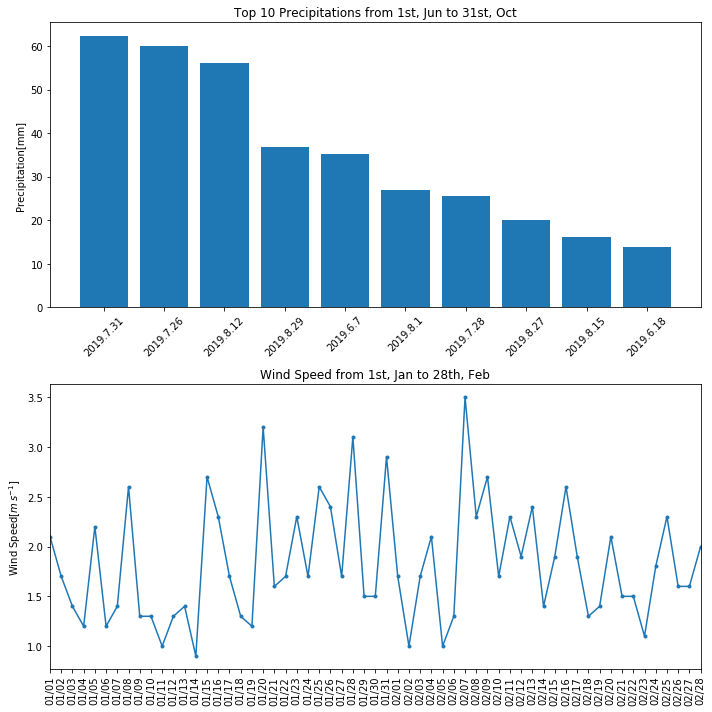

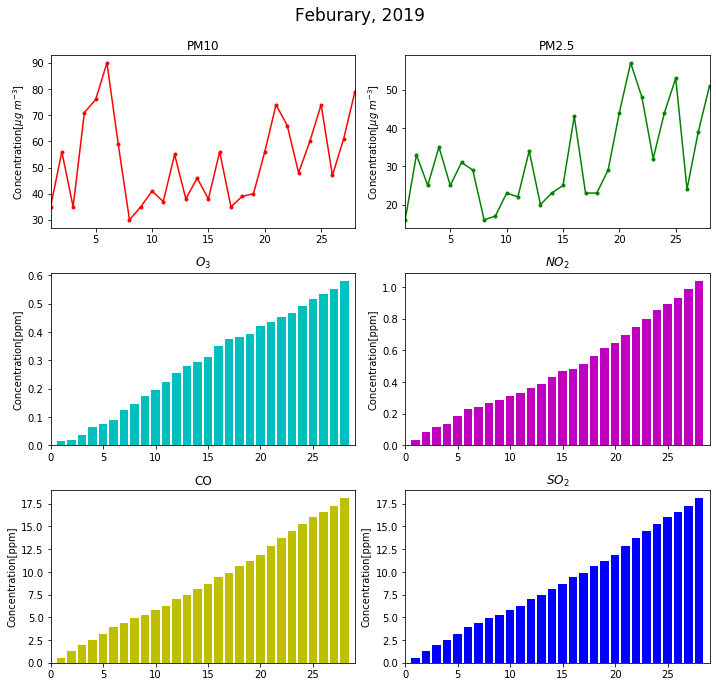

In [2]:
#################################### AC: EX1 ##################################
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('week4_ex.csv')
data = data.rename(columns = {'ate':'date'})

temp_monthly = [[] for i in range(8)]
months = list(range(1,9))
temp_max = []
temp_min = []
temp_avg = []

for i in range(len(data)):
    month = int(data['date'][i][5])
    #print(month)
    #print(data['temp'][i])
    temp_monthly[month-1].append(data['temp'][i])

for temp_month in temp_monthly:
    temp_month.sort()
    temp_min.append(temp_month[0])
    temp_max.append(temp_month[-1])
    temp_avg.append(sum(temp_month)/len(temp_month))



result = pd.DataFrame(list(zip(months, temp_max, temp_min, temp_avg)), columns = ['Month','T_max', 'T_min', 'T_avg'])
result.plot('Month',['T_max', 'T_min', 'T_avg'], marker = 'o')
plt.title('Monthly Variation of Temperature')
plt.ylabel('Temperature[$^\circ C$]')
plt.show() 

#################################### AC: EX2 ##################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

data = pd.read_csv('week4_ex.csv').rename(columns = {'ate':'date'})
w_start, w_end = 0, 0
p_start, p_end = 0, 0

for i in range(len(data)):
    if data['date'][i]  == '2019.1.1':
        w_start = i
    if data['date'][i]  == '2019.2.28':
        w_end = i
    if data['date'][i]  == '2019.6.1':
        p_start = i
    if data['date'][i]  == '2019.8.31':
        p_end = i

#PRECIPITATION
precipitation = data.loc[p_start:p_end]
precipitation_sorted = precipitation.sort_values(by = 'precipitation', ascending = False, na_position = 'last')


# WIND SPEED
wind_speed = data.loc[w_start:w_end]
date_list = [(datetime(2019,1,1) + timedelta(days=x)).strftime('%m/%d') for x in range(0, len(wind_speed))]
months = mdates.MonthLocator() 
days = mdates.DayLocator()

plt.figure(figsize = (10,10))


plt.subplot(211)
plt.bar(precipitation_sorted['date'][0:10],precipitation_sorted['precipitation'][0:10])
plt.xticks(rotation = 45)
plt.title("Top 10 Precipitations from 1st, Jun to 31st, Oct")
plt.ylabel("Precipitation[mm]")

plt.subplot(212)
plt.plot(date_list,wind_speed['windspeed'], marker = '.')
plt.title("Wind Speed from 1st, Jan to 28th, Feb")
plt.xlim(date_list[0],date_list[58])
plt.ylabel("Wind Speed[$m\,s^{-1}$]")
plt.xticks(rotation = 90)


plt.tight_layout()

#################################### AC: HW1 ##################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('week4_ex.xls',encoding='euc-kr')

data = data.rename(columns = {'날짜':'date','오 존':'O3', '이산화질소':'NO2', '일산화탄소':'CO','아황산가스':'SO2'})
date_range = list(range(1,29))
data_cumsum = data.drop(0).cumsum()

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)


fig.suptitle('Feburary, 2019', fontsize = 17)

ax1.plot(date_range,data['PM10'][1:29], marker = '.', color = 'r')
ax1.set_title('PM10',fontsize = 12)
ax1.set_ylabel('Concentration[$\mu g\; m^{-3}$]')
ax1.set_xlim(1,28)

ax2.plot(date_range,data['PM2.5'][1:29], marker = '.',  color = 'g')
ax2.set_title('PM2.5',fontsize = 12)
ax2.set_ylabel('Concentration[$\mu g\; m^{-3}$]')
ax2.set_xlim(1,28)

ax3.bar(date_range,data_cumsum['O3'][:29], color = 'c')
ax3.set_title('$O_3$',fontsize = 12)
ax3.set_ylabel('Concentration[ppm]')
ax3.set_xlim(0,29)


ax4.bar(date_range,data_cumsum['NO2'][:29],color = 'm')
ax4.set_title('$NO_2$',fontsize = 12)
ax4.set_ylabel('Concentration[ppm]')
ax4.set_xlim(0,29)

ax5.bar(date_range,data_cumsum['CO'][:29], color = 'y')
ax5.set_title('CO',fontsize = 12)
ax5.set_ylabel('Concentration[ppm]')
ax5.set_xlim(0,29)

ax6.bar(date_range,data_cumsum['CO'][:29], color = 'b')
ax6.set_title('$SO_2$',fontsize = 12)
ax6.set_ylabel('Concentration[ppm]')
ax6.set_xlim(0,29)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])







